In [4]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import datetime
import sys
import pytz

%matplotlib inline

In [8]:
path = "/mnt/data2016/"

In [5]:
def stringToTS(string):
    dt = datetime.datetime.strptime(string, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
    ts = dt.timestamp()
    return ts

In [11]:
def getDF0123(path, start_ts, end_ts):
    df0 = prep.getDF(path, start_ts, end_ts, 0)
    df1 = prep.getDF(path, start_ts, end_ts, 1)
    df2 = prep.getDF(path, start_ts, end_ts, 2)
    df3 = prep.getDF(path, start_ts, end_ts, 3)
    
    return df0,df1,df2,df3

In [14]:
def getNumFrames(df):
    return df.groupby(by='frame_idx').size().shape[0]

In [653]:
start = "2016-07-26T23:55:00Z"
start_ts = stringToTS(start)
end_ts = start_ts + 5*60

In [654]:
df0,df1,df2,df3 = getDF0123(path, start_ts, end_ts)

In [655]:
getNumFrames(df0),getNumFrames(df1),getNumFrames(df2), getNumFrames(df3)

(902, 903, 878, 910)

In [658]:
abs(s3-Series(list(s3)[1:])).max()

2.9320740699768066

In [659]:
abs(s2-Series(list(s2)[1:])).max()

0.8610079288482666

In [656]:
s3 = Series((df2.timestamp.unique()))

In [657]:
s2 = Series((df3.timestamp.unique()))

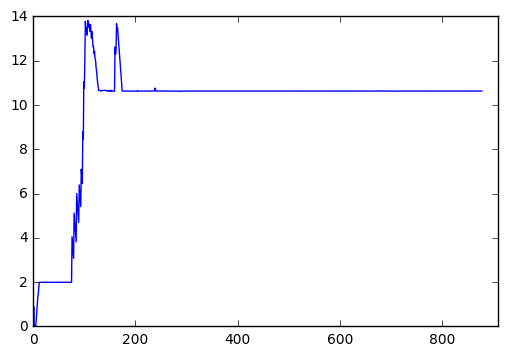

In [660]:
(abs(s3-s2)).plot()

In [504]:
def myfunction(stuff):
    return stuff.apply(lambda x: x.d, axis=1).idxmin()

In [667]:
def mapping(df_one, df_two):
    s_one = Series((df_one.timestamp.unique()))
    s_two = Series((df_two.timestamp.unique()))
    
    mapping = []
    for i in list(range(len(s_one))):
        d = abs(s_one[i]-s_two)
        min_idx = d.idxmin()
        mapping.append((i, min_idx, d[min_idx]))
    
    mapping = DataFrame(mapping, columns=["idx_one","idx_two",'d'])
    fix = mapping.groupby(by="idx_two").apply(myfunction).values
    mapping = mapping.iloc[fix]
    mapping = mapping[mapping['d'] < (0.332/2)]
    
    # drop stuff
    df_one = df_one[df_one.frame_idx.isin(mapping.idx_one)]
    df_two = df_two[df_two.frame_idx.isin(mapping.idx_two)]
    
    # change the frame_idx accordingly
    df_two.frame_idx = df_one.frame_idx.apply(lambda x: mapping.idx_two[x])

    return df_one, df_two

In [668]:
d3, d2 = mapping(df3,df2)

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [766]:
df_one = df3
df_two = df2

s_one = Series((df_one.timestamp.unique()))
s_two = Series((df_two.timestamp.unique()))

In [767]:
s_one.shape

(910,)

In [768]:
s_two.shape

(878,)

In [769]:
mapping = []
for i in list(range(len(s_one))):
    d = abs(s_one[i]-s_two)
    min_idx = d.idxmin()
    mapping.append((i, min_idx, d[min_idx]))

mapping = DataFrame(mapping, columns=["idx_one","idx_two",'d'])

In [770]:
mapping.shape

(910, 3)

In [771]:
fix = mapping.groupby(by="idx_two").apply(myfunction).values

In [772]:
mapping = mapping.iloc[fix]

In [773]:
mapping.shape

(846, 3)

In [774]:
mapping = mapping[mapping['d'] < (0.332/2)]

In [775]:
len(mapping.idx_two)

832

In [776]:
# drop stuff
df_one = df_one[df_one.frame_idx.isin(mapping.idx_one)]
df_two = df_two[df_two.frame_idx.isin(mapping.idx_two)]

In [777]:
mapping.head(10)

,idx_one,idx_two,d
0,0,1,0.038993
1,1,2,0.000000
2,2,4,0.000175
5,5,5,0.000125
12,12,6,0.000000
13,13,7,0.000003
14,14,8,0.000075
15,15,9,0.000058
16,16,10,0.000039
17,17,11,0.000094


In [778]:
mapping.head()

,idx_one,idx_two,d
0,0,1,0.038993
1,1,2,0.000000
2,2,4,0.000175
5,5,5,0.000125
12,12,6,0.000000


In [779]:
df_one.frame_idx.unique()[:10]

array([ 0,  1,  2,  5, 12, 13, 14, 15, 16, 17])

In [780]:
df_two.frame_idx.unique()[:10]

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11])

In [781]:
mapping = mapping.set_index('idx_two')

In [782]:
new = df_two.frame_idx.apply(lambda x: mapping.idx_one[x])

In [784]:
# change the frame_idx accordingly
df.two = df_two.assign(frame_idx = new)

In [785]:
len(df_one.frame_idx.unique())

832

In [786]:
len(df_two.frame_idx.unique())

832

In [763]:
abs(df_one.timestamp.unique() - df_two.timestamp.unique()).min()

0.0

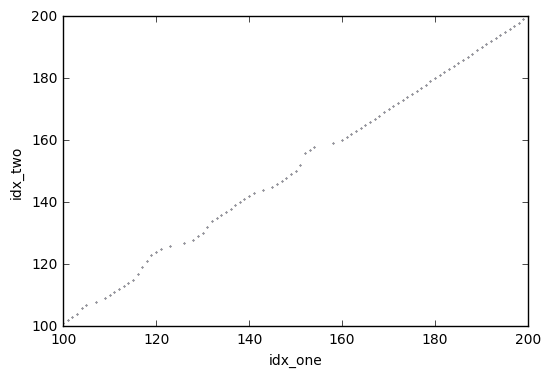

In [595]:
m.plot.scatter(x="idx_one", y="idx_two", s=0.1, xlim=(100,200), ylim=(100,200))